In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings

matplotlib.rcParams['font.family'] = 'Binggrae'
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['font.size'] = 13
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('train.csv', index_col = 'id')
df2 = pd.read_csv('test.csv', index_col = 'id')
train_y = df1['Body Mass (g)']
train_x = df1.drop(columns = 'Body Mass (g)')
df=pd.concat([df2,train_x])

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 113
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              342 non-null    object 
 1   Island               342 non-null    object 
 2   Clutch Completion    342 non-null    object 
 3   Culmen Length (mm)   342 non-null    float64
 4   Culmen Depth (mm)    342 non-null    float64
 5   Flipper Length (mm)  342 non-null    float64
 6   Sex                  333 non-null    object 
 7   Delta 15 N (o/oo)    330 non-null    float64
 8   Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(5), object(4)
memory usage: 26.7+ KB
None


## EDA _ preprocessing

<AxesSubplot:>

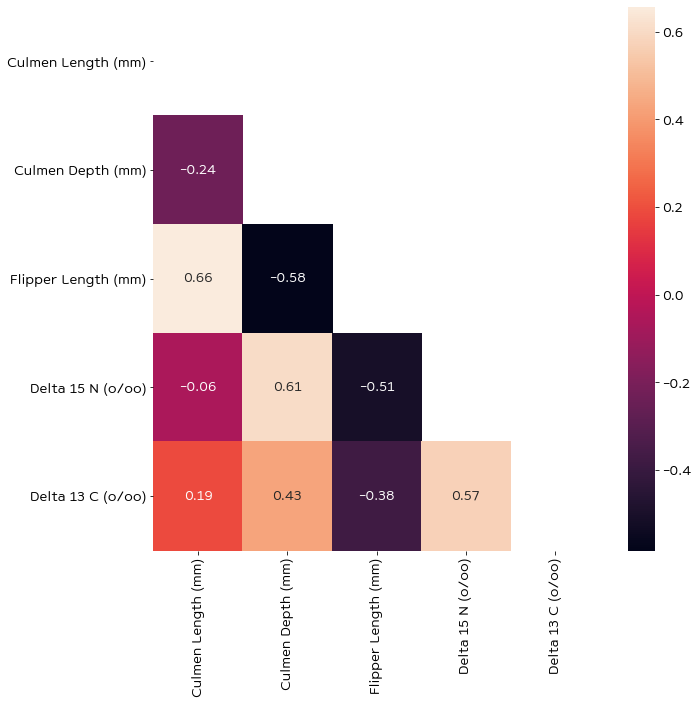

In [4]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, mask=mask)

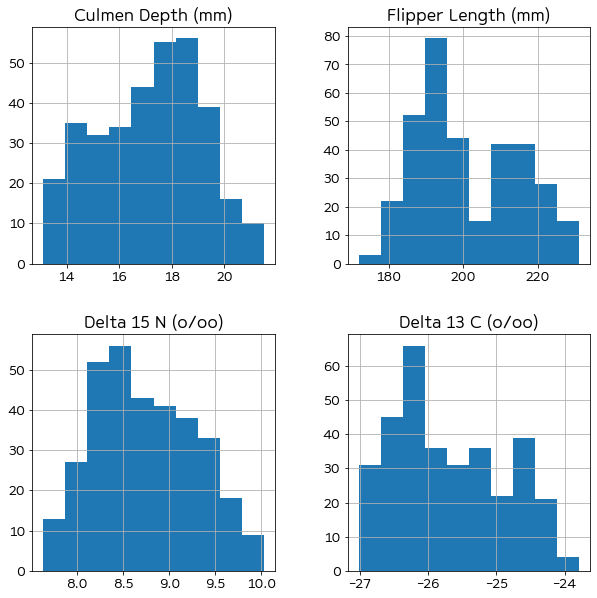

In [5]:
df[['Culmen Depth (mm)','Flipper Length (mm)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']].hist(figsize = (10,10))
plt.show()

<AxesSubplot:>

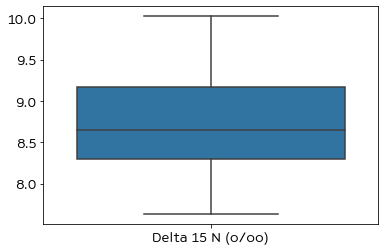

In [6]:
sns.boxplot(data =df[['Delta 15 N (o/oo)']])

<AxesSubplot:>

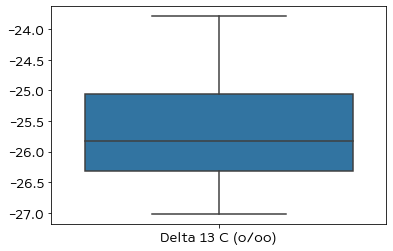

In [7]:
sns.boxplot(data =df[['Delta 13 C (o/oo)']])

<AxesSubplot:>

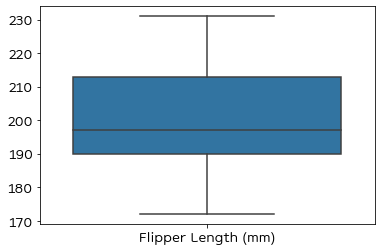

In [8]:
sns.boxplot(data =df[['Flipper Length (mm)']])

In [9]:
df['Species'].value_counts()
#Island  , Sex 

Adelie Penguin (Pygoscelis adeliae)          151
Gentoo penguin (Pygoscelis papua)            123
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

In [10]:
df['Island'].value_counts()

Biscoe       167
Dream        124
Torgersen     51
Name: Island, dtype: int64

In [11]:
df['Sex'].value_counts()

MALE      168
FEMALE    165
Name: Sex, dtype: int64

In [12]:
pd.get_dummies(df)

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Species_Adelie Penguin (Pygoscelis adeliae),Species_Chinstrap penguin (Pygoscelis antarctica),Species_Gentoo penguin (Pygoscelis papua),Island_Biscoe,Island_Dream,Island_Torgersen,Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
id,,,,,,,,,,,,,,,
0,52.0,20.7,210.0,9.43146,-24.68440,0,1,0,0,1,0,0,1,0,1
1,55.9,17.0,228.0,8.31180,-26.35425,0,0,1,1,0,0,0,1,0,1
2,38.9,18.8,190.0,8.36936,-26.11199,1,0,0,0,1,0,0,1,1,0
3,45.2,16.6,191.0,9.62357,-24.78984,0,1,0,0,1,0,0,1,1,0
4,37.9,18.6,172.0,8.38404,-25.19837,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,36.6,17.8,185.0,NaN,NaN,1,0,0,0,0,1,0,1,1,0
110,39.2,18.6,190.0,9.11006,-25.79549,1,0,0,0,1,0,0,1,0,1
111,43.2,18.5,192.0,8.97025,-26.03679,1,0,0,0,1,0,0,1,0,1


In [ ]:
df